In [88]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import math

#graph func
def initialize_grid():
    fig, ax = plt.subplots(figsize=(6, 6))
    
    # where do we want lines
    ticks = np.arange(-20, 20, 1)
    
    # draw grid
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.grid(True, which='both')
    
    # 1-1 X and Y proportion
    ax.set_aspect('equal')
    
    # X and Y axes
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    
    # set axes' limits
    ax.set_xlim([-20, 20])
    ax.set_ylim([-20, 20])

### 1. Euclidean plane

Consider this 3 points on 2D space:  
$A=(4, 5)$  
$B=(-2, -4)$  
$C=(8, -1)$  

#### 1.1. Plot them using `matplotlib`  

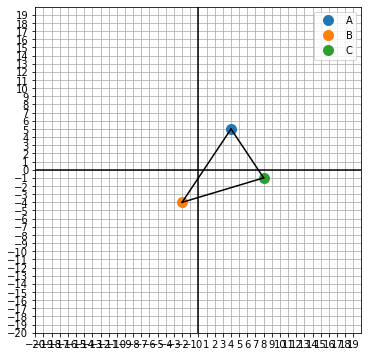

In [89]:
a = (4,5)
b = (-2,-4)
c= (8,-1)

initialize_grid()
# "-" for line type
plt.plot(a[0], a[1], "o", markersize=10, label="A")
plt.plot(b[0], b[1], "o", markersize=10, label="B")
plt.plot(c[0], c[1], "o", markersize=10, label="C")

plt.plot((a[0], b[0]), (a[1], b[1]), "black")
plt.plot((a[0], c[0]), (a[1], c[1]), "black")
plt.plot((b[0], c[0]), (b[1], c[1]), "black")





plt.legend()

#### 1.2. Which distance is longer, $AC, AB, \text{or} BC$? Write a function that calculates distance between two points.

In [90]:
def points_distance(p1, p2):
    return  math.sqrt( ((p1[0]-p2[0])**2)+((p1[1]-p2[1])**2) )

ac = points_distance(a,c)
ab = points_distance(a,b)
bc = points_distance(b,c)
      
print (ac)
print (ab)
print (bc)


7.211102550927978
10.816653826391969
10.44030650891055


#### 1.3. What is the perimeter of triangle $ABC$?

In [91]:
perim = ac + ab + bc
print (perim)

28.4680628862305


### 2. Linear functions

Consider the following straight lines on 2D space:  
$y_1=2x-3$  
$y_2=-3x+12$  

In [92]:
x = np.linspace(
    start=-10, 
    stop=10, 
    num=300
)

y = 2 * x - 3
y2 = -3 * x + 12

<function matplotlib.pyplot.legend(*args, **kwargs)>

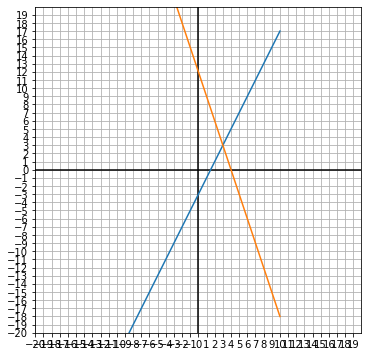

In [93]:
initialize_grid()
plt.plot(x, y, "-", markersize=10, label="2x-3")
plt.plot(x, y2, "-", markersize=10, label="-3x+12")

plt.legend

#### 2.2. What are the respective slopes

In [94]:
slope1 = y[1] - y[0] / x[1] - x[0]
print (slope1)
slope2 = y2[1] - y2[0] / x[1] - x[0]
print  (slope2)

-15.181708951274167
56.02761393196175


#### 2.3. Give 3 points through which $y_1$ goes through

In [95]:
point1 = x[100], y[100]
point2 = x[110], y[110]
point3 = x[120], y[120]
print (point1, point2, point3)

(-3.311036789297659, -9.622073578595318) (-2.642140468227425, -8.28428093645485) (-1.9732441471571907, -6.946488294314381)


#### 2.4. Where do they intersect?

line1 = line2 <br>
2x-3 = -3x+12 <br>
x = 3

In [96]:
x = 3
#x value is 3
y = 2*3 -3
print (x,y)

3 3


#### 2.5. BONUS 

My yearly salary has increased **linearly** with my age:  
When I was 21 years old, I did 10000\\$ / year    
Today I am 39 years old, I am doing 33400\\$ / year  
How much will I do when I get 50 years old?

In [97]:
slope= (33400 - 10000) / 39-21 
salary = slope * 50 + 10000
print (salary)

38950.0


### 3. Polynomials

Consider these different degree polynomials:  
$y_2=x^2-3x-10$  
$y_3=x^3-2x^2+5x+1$  
$y_4=x^4-x^3+x^2-x+1$  

#### 3.1. Plot them

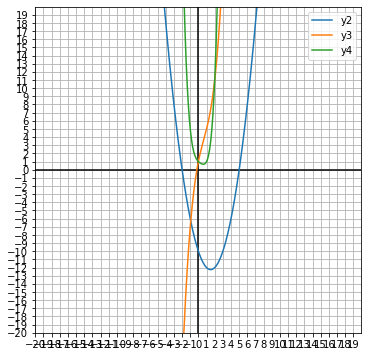

In [98]:
initialize_grid()

x = np.linspace(
    start=-10, 
    stop=10, 
    num=300
)
y2 = x ** 2 - 3 * x - 10
y3 = x ** 3 - 2 * x ** 2 + 5 * x + 1
y4 = x ** 4 - x ** 3 + x ** 2 - x + 1

plt.plot(x, y2, "-", label="y2")
plt.plot(x, y3, "-", label="y3")
plt.plot(x, y4, "-", label="y4")

plt.legend()

#### 3.2. Which one takes a bigger value on $x=0$? On $x=2$? On $x=100$?

#### 3.3. Who is the vertex of parabola $y_2$?

#### 3.4. Where does $y_2$ intersect X axis? And Y axis?

In [ ]:
y2 intersects x at -2 and 5
y2 intersects y at -10

#### 3.5. As x gets very big, what happens to $y$ go in each case?

#### 3.6. As x gets very small (big negative), what happens to $y$ go in each case?

### 4. Exponential

#### 4.1. Print number $e$ rounded to 3 decimal figures

In [68]:
print(round(np.e,3))

2.718


#### 4.2. Compute $e$ to the powers 0, 1, 2, 3, 10

In [73]:
E = np.e
print(E**0)
print(E**1)
print(E**2)
print(E**3)
print(E**10)

1.0
2.718281828459045
7.3890560989306495
20.085536923187664
22026.465794806703


#### 4.3. Compute $e$ to the powers 0, -1, -2, -3, -10

In [74]:
print(E**0)
print(E**-1)
print(E**-2)
print(E**-3)
print(E**-10)

1.0
0.36787944117144233
0.1353352832366127
0.04978706836786395
4.5399929762484875e-05


#### 4.4. Plot functions $e^x$, $e^{2x}$, $e^{-x}$

Note: choose an appropiate x-range to visualize them all toguether

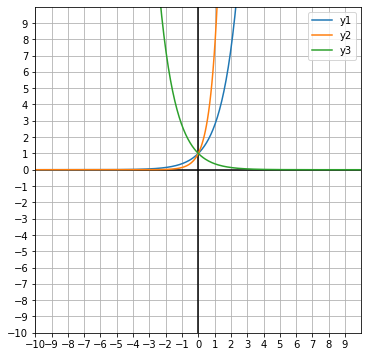

In [78]:
initialize_grid()

x = np.linspace(
    start=-10, 
    stop=10, 
    num=300
)
y1 = E**x
y2 = E**(2*x)
y3 = E**-x

plt.plot(x, y1, "-", label="y1")
plt.plot(x, y2, "-", label="y2")
plt.plot(x, y3, "-", label="y3")

plt.legend()

### 5. Sum notation

Find the following:

$$\sum_{n=4}^7 n$$

In [79]:
4+5+6+7

22

$$\sum_{n=-2}^3 (n + 1)$$

In [80]:
-1 + 0 + 1 + 2 + 3 + 4

9

$$\sum_{n=-2}^3 (n^2 - 2)$$

In [81]:
(-2**2 - 2) + (-1**2 -2)+ (0**2 -2) + (1**2 -2)+ (2**2 -2)+ (3**2 -2)

-3

$$\sum_{n=0}^4 (10^n - 1)$$

In [82]:
(10**0 -1) +(10**1 -1)+(10**2 -1)+(10**3 -1)+(10**4 -1)

11106

### 6. Combinatorics

#### 6.1. Ten people go to a party. How many handshakes happen?

In [83]:
 9+8+7+6+5+4+3+2+1

45

#### 6.2. My family is composed of 11 members. By christmas, one buys food, one cooks and one cleans. How many possible arrangements of buyer-cooker-cleaner are there?

N=11
k=3

In [101]:
N=11
k=3

combinations = 11*10*9
print (combinations)


990


### BONUS

11 and 13 are twin primes, since:
 - they are both primes  
 - their distance is 2
 
Find all pairs of twin primes below 1000

In [113]:
def is_prime(n):
   for i in range(2, n):
      if n % i == 0:
         return False
   return True

def twins(start, end):
   for i in range(start, end):
      j = i + 2
      if(is_prime(i) and is_prime(j)):
         print(f"{i} and {j}")

twins(1, 1000)

1 and 3
3 and 5
5 and 7
11 and 13
17 and 19
29 and 31
41 and 43
59 and 61
71 and 73
101 and 103
107 and 109
137 and 139
149 and 151
179 and 181
191 and 193
197 and 199
227 and 229
239 and 241
269 and 271
281 and 283
311 and 313
347 and 349
419 and 421
431 and 433
461 and 463
521 and 523
569 and 571
599 and 601
617 and 619
641 and 643
659 and 661
809 and 811
821 and 823
827 and 829
857 and 859
881 and 883
